# Data Collection

## 1.1 Import Libraries


In [2]:
import os
import sys
import joblib
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import dump
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Add the root of the project to the Python path
project_root = os.path.abspath('..')
if project_root not in sys.path:
    sys.path.append(project_root)

# Import custom modules
try:
    from scripts.preprocess import Preprocessor
    from scripts.model import ModelTrainer
    print("Custom module imports successful!")
except ImportError as e:
    print(f"ImportError: {e}")


Custom module imports successful!


## 1.2 Import Warnings and Logging Libraries


In [3]:
# Warnings and logging
import warnings
import logging
warnings.filterwarnings("ignore")

# Append the correct path for custom module imports
sys.path.append(os.path.abspath('../src'))
sys.path.append(os.path.abspath('../data'))
sys.path.append(os.path.abspath('../notebook/models'))

# Optional custom logging (currently commented out)
# from custom_logging import info_logger, error_logger


In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed

# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


## 1.2 Load the Data


In [5]:
# Define the paths to the datasets
train_path = '../data/train.csv'  # Update to the correct path on your local machine
test_path = '../data/test.csv'    # Update to the correct path on your local machine
store_path = '../data/store.csv'  # Update to the correct path on your local machine

# Initialize the Preprocessor class
preprocessor = Preprocessor(train_path, test_path, store_path)

# Load the datasets
try:
    train_data, test_data, store_data = preprocessor.load_data()
    print("Datasets loaded successfully!")
except FileNotFoundError as e:
    print(f"FileNotFoundError: {e}")


Datasets loaded successfully!


# Data Preprocessing

## 2.1 Summary of Dataset


In [6]:
# Summarize the dataset
preprocessor.summarize_data()


Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object
              Store     DayOfWeek         Sales     Customers          Open  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01   
std    3.219087e+02  1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  3.727000e+03  4.050000e+02  1.000000e+00   
50%    5.580000e+02  4.000000e+00  5.744000e+03  6.090000e+02  1.000000e+00   
75%    8.380000e+02  6.000000e+00  7.856000e+03  8.370000e+02  1.000000e+00   
max    1.115000e+03  7.000000e+00  4.155100e+04  7.388000e+03  1.000000e+00   

              Promo  SchoolHoliday  
count  1.017209e+06  

## 2.2 Descriptive Statistics for Training Data


In [7]:
# Display descriptive statistics for the training dataset
train_data.describe()


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


## 2.3 Data Types and Descriptive Statistics for Test and Store Data


In [8]:
# Display data types for the test dataset
print(test_data.dtypes)

# Display data types for the store dataset
print(store_data.dtypes)

# Display descriptive statistics for the store dataset
store_data.describe()


Id                 int64
Store              int64
DayOfWeek          int64
Date              object
Open             float64
Promo              int64
StateHoliday      object
SchoolHoliday      int64
dtype: object
Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object


,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


## 2.4 Data Cleaning

### 2.4.1 Checking Missing Values in Training Data


In [9]:
# Check for missing values in the training dataset
train_data.isna().sum()


Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

### 2.4.2 Checking Missing Values in Testing Data


In [10]:
# Check for missing values in the testing dataset
test_data.isna().sum()


Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

### 2.4.3 Checking Missing Values in Store Data


In [11]:
# Check for missing values in the store dataset
store_data.isnull().sum()


Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

## 2.5 Merge the Dataset


In [12]:
# Merge the datasets using the Preprocessor class
merged_data = preprocessor.merge_datasets()

# Display the head of the final combined dataset
merged_data.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Id
0,1,5,2015-07-31,5263.0,555.0,1.0,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,NaN
1,2,5,2015-07-31,6064.0,625.0,1.0,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",NaN
2,3,5,2015-07-31,8314.0,821.0,1.0,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",NaN
3,4,5,2015-07-31,13995.0,1498.0,1.0,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,NaN
4,5,5,2015-07-31,4822.0,559.0,1.0,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,NaN


In [13]:
# Check the shape of the merged dataset
merged_data.shape


(1058297, 19)

### 2.5.2 Checking Missing Values in the Merged Dataset


In [14]:
# Check for missing values in the merged dataset
merged_data.isnull().sum()


Store                              0
DayOfWeek                          0
Date                               0
Sales                          41088
Customers                      41088
Open                              11
Promo                              0
StateHoliday                       0
SchoolHoliday                      0
StoreType                          0
Assortment                         0
CompetitionDistance             2738
CompetitionOpenSinceMonth     338564
CompetitionOpenSinceYear      338564
Promo2                             0
Promo2SinceWeek               525263
Promo2SinceYear               525263
PromoInterval                 525263
Id                           1017209
dtype: int64

## 2.6 Handling Missing Values


In [15]:
# Handle missing values in the merged dataset
cleaned_data = preprocessor.handle_missing_values()

# Verify if there are still missing values
print(cleaned_data.isnull().sum())


Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


## 2.7 Feature Engineering




In [16]:
# Perform feature engineering on the dataset
X, y = preprocessor.feature_engineering()

# Display the head of the engineered dataset
X.head()


,Store,DayOfWeek,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,...,Month,Year,IsWeekend,IsBeginningOfMonth,IsMidMonth,IsEndOfMonth,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,4,555.0,1.0,1,1,2,0,-0.538295,9.0,...,0.320159,1.41208,0,0,0,1,True,False,False,False
1,2,4,625.0,1.0,1,1,0,0,-0.629336,11.0,...,0.320159,1.41208,0,0,0,1,True,False,False,False
2,3,4,821.0,1.0,1,1,0,0,1.134269,12.0,...,0.320159,1.41208,0,0,0,1,True,False,False,False
3,4,4,1498.0,1.0,1,1,2,2,-0.622833,9.0,...,0.320159,1.41208,0,0,0,1,True,False,False,False
4,5,4,559.0,1.0,1,1,0,0,3.186606,4.0,...,0.320159,1.41208,0,0,0,1,True,False,False,False


In [17]:
# The feature engineering step already includes extracting date-based features
# This step is handled within the Preprocessor class

# Perform feature engineering on the dataset (already includes extracting date-based features)
X, y = preprocessor.feature_engineering()

# Display the head of the engineered dataset
X.head()


,Store,DayOfWeek,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,...,Month,Year,IsWeekend,IsBeginningOfMonth,IsMidMonth,IsEndOfMonth,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,4,555.0,1.0,1,1,2,0,-0.538295,9.0,...,0.320159,1.41208,0,0,0,1,True,False,False,False
1,2,4,625.0,1.0,1,1,0,0,-0.629336,11.0,...,0.320159,1.41208,0,0,0,1,True,False,False,False
2,3,4,821.0,1.0,1,1,0,0,1.134269,12.0,...,0.320159,1.41208,0,0,0,1,True,False,False,False
3,4,4,1498.0,1.0,1,1,2,2,-0.622833,9.0,...,0.320159,1.41208,0,0,0,1,True,False,False,False
4,5,4,559.0,1.0,1,1,0,0,3.186606,4.0,...,0.320159,1.41208,0,0,0,1,True,False,False,False


In [18]:
# The feature engineering step already includes handling missing values and label encoding
# Additional holiday features can be implemented if a holiday dataset is available

# Perform feature engineering on the dataset (already includes label encoding and handling missing values)
X, y = preprocessor.feature_engineering()

# Display the head of the engineered dataset
X.head()


,Store,DayOfWeek,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,...,Month,Year,IsWeekend,IsBeginningOfMonth,IsMidMonth,IsEndOfMonth,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,4,555.0,1.0,1,1,2,0,-0.538295,9.0,...,0.320159,1.41208,0,0,0,1,True,False,False,False
1,2,4,625.0,1.0,1,1,0,0,-0.629336,11.0,...,0.320159,1.41208,0,0,0,1,True,False,False,False
2,3,4,821.0,1.0,1,1,0,0,1.134269,12.0,...,0.320159,1.41208,0,0,0,1,True,False,False,False
3,4,4,1498.0,1.0,1,1,2,2,-0.622833,9.0,...,0.320159,1.41208,0,0,0,1,True,False,False,False
4,5,4,559.0,1.0,1,1,0,0,3.186606,4.0,...,0.320159,1.41208,0,0,0,1,True,False,False,False


In [19]:
# The feature engineering step already includes scaling the data
# This step is handled within the Preprocessor class

# Perform feature engineering on the dataset (already includes scaling the data)
X, y = preprocessor.feature_engineering()

# Display the head of the scaled dataset
X.head()


,Store,DayOfWeek,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,...,Month,Year,IsWeekend,IsBeginningOfMonth,IsMidMonth,IsEndOfMonth,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,4,555.0,1.0,1,1,2,0,-0.538295,9.0,...,0.320159,1.41208,0,0,0,1,True,False,False,False
1,2,4,625.0,1.0,1,1,0,0,-0.629336,11.0,...,0.320159,1.41208,0,0,0,1,True,False,False,False
2,3,4,821.0,1.0,1,1,0,0,1.134269,12.0,...,0.320159,1.41208,0,0,0,1,True,False,False,False
3,4,4,1498.0,1.0,1,1,2,2,-0.622833,9.0,...,0.320159,1.41208,0,0,0,1,True,False,False,False
4,5,4,559.0,1.0,1,1,0,0,3.186606,4.0,...,0.320159,1.41208,0,0,0,1,True,False,False,False


In [20]:
# Define the target (sales) and features using the Preprocessor class
X, y = preprocessor.feature_engineering()

# Display the head of the features and target
X.head(), y.head()


(   Store  DayOfWeek  Customers  Open  Promo  SchoolHoliday  StoreType  \
 0      1          4      555.0   1.0      1              1          2   
 1      2          4      625.0   1.0      1              1          0   
 2      3          4      821.0   1.0      1              1          0   
 3      4          4     1498.0   1.0      1              1          2   
 4      5          4      559.0   1.0      1              1          0   
 
    Assortment  CompetitionDistance  CompetitionOpenSinceMonth  ...     Month  \
 0           0            -0.538295                        9.0  ...  0.320159   
 1           0            -0.629336                       11.0  ...  0.320159   
 2           0             1.134269                       12.0  ...  0.320159   
 3           2            -0.622833                        9.0  ...  0.320159   
 4           0             3.186606                        4.0  ...  0.320159   
 
       Year  IsWeekend  IsBeginningOfMonth  IsMidMonth  IsEndOfMon

In [21]:
# Check for non-numeric columns in the feature set
non_numeric_columns = X.select_dtypes(include=['object']).columns
print(f"Non-numeric columns: {non_numeric_columns}")

# Apply One-Hot Encoding to categorical columns (if any)
X_encoded = pd.get_dummies(X, columns=non_numeric_columns)

# Split data into train and test sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


Non-numeric columns: Index([], dtype='object')


In [22]:
# Convert datetime column to pandas datetime
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'])

In [23]:
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'])
cleaned_data['Day'] = cleaned_data['Date'].dt.day
cleaned_data['WeekOfYear'] = cleaned_data['Date'].dt.isocalendar().week
cleaned_data['Month'] = cleaned_data['Date'].dt.month
cleaned_data['Year'] = cleaned_data['Date'].dt.year
cleaned_data['DayOfWeek'] = cleaned_data['Date'].dt.dayofweek
cleaned_data['IsWeekend'] = cleaned_data['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
cleaned_data['IsBeginningOfMonth'] = cleaned_data['Day'].apply(lambda x: 1 if x <= 7 else 0)
cleaned_data['IsMidMonth'] = cleaned_data['Day'].apply(lambda x: 1 if 8 <= x <= 21 else 0)
cleaned_data['IsEndOfMonth'] = cleaned_data['Day'].apply(lambda x: 1 if x > 21 else 0)


In [24]:
# Additional features: Days to nearest holidays
# add logic here to compute 'days to next holiday' and 'days after holiday' based on a holiday dataset.

# Label encode categorical features
categorical_features = ['StoreType', 'Assortment', 'PromoInterval']
label_encoder = LabelEncoder()
for col in categorical_features:
    cleaned_data[col] = label_encoder.fit_transform(cleaned_data[col].astype(str))

# Handle missing values, e.g., fill missing competition distance with the median
cleaned_data['CompetitionDistance'].fillna(cleaned_data['CompetitionDistance'].median(), inplace=True)


In [25]:
scaler = StandardScaler()
scaled_columns = ['CompetitionDistance', 'Day', 'WeekOfYear', 'Month', 'Year']
cleaned_data[scaled_columns] = scaler.fit_transform(cleaned_data[scaled_columns])

In [26]:

# Define the target (sales) and features
X = cleaned_data.drop(columns=['Sales', 'Date'])
y = cleaned_data['Sales']

In [27]:
# Check for non-numeric columns in the feature set
non_numeric_columns = X.select_dtypes(include=['object']).columns
print(f"Non-numeric columns: {non_numeric_columns}")

# Apply One-Hot Encoding to categorical columns (if any)
X_encoded = pd.get_dummies(X, columns=non_numeric_columns)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

Non-numeric columns: Index(['StateHoliday'], dtype='object')


## 2.10 Training the XGBoost Model


In [28]:
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

# Assuming your data is already preprocessed
# and you have X_train, y_train, X_test, y_test ready

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and fit the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_train_xgb = xgb_model.predict(X_train_scaled)
y_pred_test_xgb = xgb_model.predict(X_test_scaled)

# Output some predictions as a sanity check
print("Sample predictions on training data:", y_pred_train_xgb[:5])
print("Sample predictions on test data:", y_pred_test_xgb[:5])


Sample predictions on training data: [7206.6875  3229.9949  7225.621   -213.30804 6911.661  ]
Sample predictions on test data: [ 7664.296   5319.6465 12274.72    8503.257   7466.6284]


## 2.11 Model Evaluation


In [29]:


def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

# Now you can use this function
mse_train_xgb, mae_train_xgb, r2_train_xgb = evaluate_model(y_train, y_pred_train_xgb)
print(f"XGBoost Training Set - MSE: {mse_train_xgb}, MAE: {mae_train_xgb}, R2: {r2_train_xgb}")

mse_test_xgb, mae_test_xgb, r2_test_xgb = evaluate_model(y_test, y_pred_test_xgb)
print(f"XGBoost Test Set - MSE: {mse_test_xgb}, MAE: {mae_test_xgb}, R2: {r2_test_xgb}")


XGBoost Training Set - MSE: 255881.89885571355, MAE: 345.20756300109946, R2: 0.9834757525547407
XGBoost Test Set - MSE: 268546.9922519878, MAE: 350.3592286691637, R2: 0.9826870786447711


## 2.13 Training the Random Forest Model


In [30]:


non_numeric_columns = X.select_dtypes(include=['object']).columns
print(f"Non-numeric columns: {non_numeric_columns}")

# Apply One-Hot Encoding to categorical columns (if any)
X_encoded = pd.get_dummies(X, columns=non_numeric_columns)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Define RandomForest model within a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
                   ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Fit the model
pipeline.fit(X_train, y_train)

Non-numeric columns: Index(['StateHoliday'], dtype='object')


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestRegressor(random_state=42))])

## 2.14 Choosing a Loss Function and Evaluating the Random Forest Model


In [31]:



# Predict and evaluate
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

# Evaluate on training set
mse_train, mae_train, r2_train = evaluate_model(y_train, y_pred_train)
print(f"Training Set - MSE: {mse_train}, MAE: {mae_train}, R2: {r2_train}")
mse_test, mae_test, r2_test = evaluate_model(y_test, y_pred_test)
print(f"Test Set - MSE: {mse_test}, MAE: {mae_test}, R2: {r2_test}")

Training Set - MSE: 25545.607964520692, MAE: 94.34106750590865, R2: 0.998350325095159
Test Set - MSE: 182404.89025365445, MAE: 253.61363861853923, R2: 0.9882405626915104


#  RandomForest model from the pipeline

In [32]:

rf_model = pipeline.named_steps['model']

# Get feature importances from the RandomForest model
importances = rf_model.feature_importances_

# Retrieve feature names after encoding
feature_names = X_encoded.columns

# Check the length of feature_names and feature importances
print(f"Length of feature names: {len(feature_names)}")
print(f"Length of feature importances: {len(importances)}")

# Display the feature importances with corresponding feature names
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

Length of feature names: 27
Length of feature importances: 27
                      Feature  Importance
2                   Customers    0.869681
6                   StoreType    0.029901
8         CompetitionDistance    0.026616
4                       Promo    0.016563
0                       Store    0.015465
12            Promo2SinceWeek    0.006318
10   CompetitionOpenSinceYear    0.005909
7                  Assortment    0.005096
9   CompetitionOpenSinceMonth    0.005031
1                   DayOfWeek    0.004671
16                 WeekOfYear    0.002868
13            Promo2SinceYear    0.002759
15                        Day    0.002659
14              PromoInterval    0.002294
18                       Year    0.001348
17                      Month    0.001275
5               SchoolHoliday    0.000354
19                  IsWeekend    0.000336
11                     Promo2    0.000280
21                 IsMidMonth    0.000239
22               IsEndOfMonth    0.000126
20         IsB

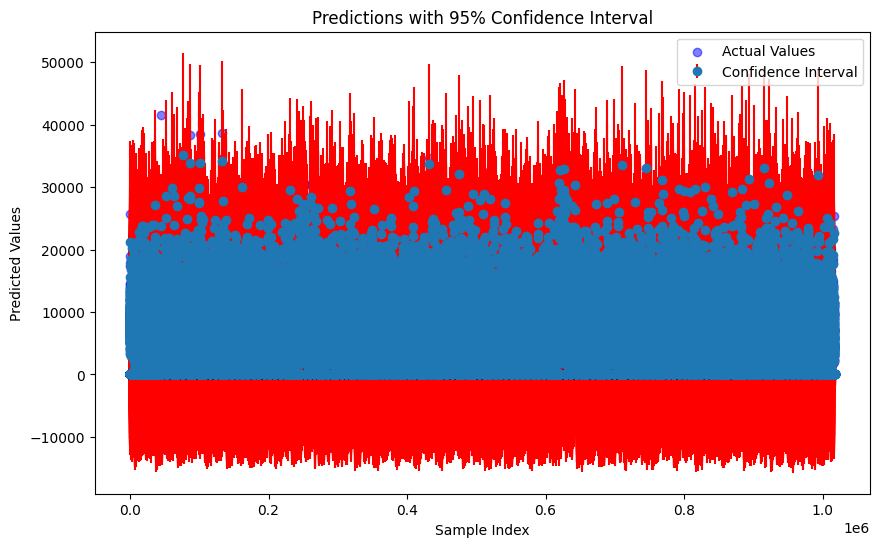

In [33]:
y_pred_std = np.std([tree.predict(X_test) for tree in rf_model.estimators_], axis=0)
confidence_interval = 1.96 * y_pred_std  # 95% confidence interval

# Plotting the predictions with confidence intervals
plt.figure(figsize=(10, 6))
plt.errorbar(y_test.index, y_pred_test, yerr=confidence_interval, fmt='o', ecolor='r', capthick=2, label="Confidence Interval")
plt.scatter(y_test.index, y_test, color='blue', label='Actual Values', alpha=0.5)
plt.title("Predictions with 95% Confidence Interval")
plt.xlabel("Sample Index")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

In [34]:
import os
import joblib
from datetime import datetime


models_dir = '../notebook/models' 

# Ensure the directory exists
os.makedirs(models_dir, exist_ok=True)

# Serialize model with timestamp
timestamp = datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
model_filename = f"{models_dir}/sales_model_{timestamp}.pkl"
joblib.dump(pipeline, model_filename)

print(f"Model saved as {model_filename}")

Model saved as ../notebook/models/sales_model_2025-01-15-01-14-11.pkl


In [35]:
import os
import sys
import joblib
from datetime import datetime

# Correct the path
sys.path.append(os.path.abspath('../notebook/models'))

# Ensure the directory exists
os.makedirs('../notebook/models', exist_ok=True)

# Serialize model with timestamp
timestamp = datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
model_filename = f"../notebook/models/sales_model_{timestamp}.pkl"
joblib.dump(pipeline, model_filename)

print(f"Model saved as {model_filename}")

Model saved as ../notebook/models/sales_model_2025-01-15-01-39-57.pkl


#model with deep learning (LSTM)

In [ ]:
time_steps = 60

def create_lagged_data(data, time_steps=60):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

sales = cleaned_data['Sales'].values
scaled_sales = (sales - sales.mean()) / sales.std()  # Scale to (-1, 1)

# Create supervised learning data for LSTM
X_lstm, y_lstm = create_lagged_data(scaled_sales, time_steps)

# Split into train/test sets
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)),
    LSTM(50),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Reshape input for LSTM
X_train_lstm = X_train_lstm.reshape((X_train_lstm.shape[0], X_train_lstm.shape[1], 1))
X_test_lstm = X_test_lstm.reshape((X_test_lstm.shape[0], X_test_lstm.shape[1], 1))

# Train the model
history = model.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=64, validation_data=(X_test_lstm, y_test_lstm))

# Predict with LSTM
y_pred_lstm = model.predict(X_test_lstm)
mse_lstm = mean_squared_error(y_test_lstm, y_pred_lstm)

Epoch 1/10
13228/13228 ━━━━━━━━━━━━━━━━━━━━ 1045s 73ms/step - loss: 0.4162 - val_loss: 0.3229
Epoch 2/10
13228/13228 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.2889

In [ ]:
# Calculate predictions

In [ ]:
y_pred_lstm = model.predict(X_test_lstm)

# Rescale predictions back to original values
y_pred_lstm_rescaled = y_pred_lstm * sales.std() + sales.mean()
y_test_lstm_rescaled = y_test_lstm * sales.std() + sales.mean()

# Calculate metrics
mae_lstm = mean_absolute_error(y_test_lstm_rescaled, y_pred_lstm_rescaled)
mse_lstm = mean_squared_error(y_test_lstm_rescaled, y_pred_lstm_rescaled)
r2_lstm = r2_score(y_test_lstm_rescaled, y_pred_lstm_rescaled)

print(f"LSTM Model - Test Set MAE: {mae_lstm:.2f}")
print(f"LSTM Model - Test Set MSE: {mse_lstm:.2f}")
print(f"LSTM Model - Test Set R²: {r2_lstm:.2f}")

: 

In [1]:
import joblib
from datetime import datetime

# Define a filename with a timestamp
timestamp = datetime.now().strftime('%Y-%m-%d-%H-%M-%S')
lstm_model_filename = f"../notebook/models/lstm_model_{timestamp}.h5"

# Save the model
model.save(lstm_model_filename)
print(f'LSTM model serialized to {lstm_model_filename}')

NameError: name 'model' is not defined

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Scaling the sales data
sales = df['Sales'].values
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_sales = scaler.fit_transform(sales.reshape(-1, 1))

# Create lagged data for LSTM
def create_lagged_data(data, time_steps=60):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 60
X_lstm, y_lstm = create_lagged_data(scaled_sales, time_steps)

# Split data into train and test sets
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

# Reshape input to be 3D [samples, time steps, features]
X_train_lstm = X_train_lstm.reshape((X_train_lstm.shape[0], X_train_lstm.shape[1], 1))
X_test_lstm = X_test_lstm.reshape((X_test_lstm.shape[0], X_test_lstm.shape[1], 1))

# Build enhanced LSTM model
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)),
    Dropout(0.2),  # Add dropout for regularization
    LSTM(100, return_sequences=True),  # Additional LSTM layer
    Dropout(0.2),  # Another dropout
    LSTM(50, return_sequences=False),  # Final LSTM layer
    Dense(50, activation='relu'),  # Dense layer to learn more complex representations
    Dense(1)  # Output layer for regression
])

# Compile the model with mean squared error loss
model.compile(optimizer='adam', loss='mse')

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=64, validation_data=(X_test_lstm, y_test_lstm), 
                    callbacks=[early_stop], verbose=2)

ModuleNotFoundError: No module named 'tensorflow'

In [63]:
# Define the models directory within the Kaggle environment
models_dir = './models'  # Use relative path for Kaggle

# Ensure the directory exists
os.makedirs(models_dir, exist_ok=True)

# Serialize model with timestamp
timestamp = datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
model_filename = f"{models_dir}/sales_model_{timestamp}.pkl"
joblib.dump(pipeline, model_filename)

print(f"Model saved as {model_filename}")

Model saved as ./models/sales_model_2025-01-12-23-17-50.pkl
